# Data Exploration of Land Animals Production for Food

## 0. Preparing

### 0.1 Read Data and Explain Data Index

In [1]:
class ReadData():
    """
    # Usage:
    # df = ReadData(file_name, url).createDF() 
    """
    def __init__(self, file_name, 
                 url = None,
                 org_name = 'good-food', 
                 repo_name = 'datamap2019', 
                 folder_path = '/data/', 
                 mode = 'wb'
                ):
        
        self.file_name = file_name
        self.org_name = org_name
        self.repo_name = repo_name
        self.folder_path = folder_path
        
        self.url = url
        self.mode = mode
        
        self.root_path = 'https://github.com/'
        self.raw_path = 'https://raw.githubusercontent.com/'
        self.branch = 'master'

    def getPath(self):
        if self.url == None:
            path = self.root_path + self.org_name + '/' + self.repo_name + '/blob/' + self.branch + self.folder_path + self.file_name
            raw_path = self.raw_path + self.org_name + '/' + self.repo_name + '/' + self.branch + self.folder_path + self.file_name
        else:
            raw_path = self.url
            path = self.url
            
        print('Url: ', path)
        print('Raw data:', raw_path)
        return raw_path

    def curl(self):
        import urllib.request, urllib.parse, urllib.error
        
        url = self.getPath()
        response = urllib.request.urlopen(url).read()
        with open(self.file_name, self.mode) as file_handle:
            file_handle.write(response)

    def delFile(self):
        import os

        if os.path.exists(self.file_name):
            os.remove(self.file_name)
        else:
            print('no such file:%s'%self.file_name)

    def createDF(self):
        import pandas as pd
        import time
        
        print(self.file_name, 'is under dealing... needs 1 min')
        self.curl()
        time.sleep(10)
        df = pd.read_csv(self.file_name)
        self.delFile()
        return df

In [2]:
# input
item = 'product_livestock'

In [3]:
data_name = item + '_clean.csv'
df_data = ReadData(data_name).createDF()
df_data.head()

product_livestock_clean.csv is under dealing... needs 1 min
Url:  https://github.com/good-food/datamap2019/blob/master/data/product_livestock_clean.csv
Raw data: https://raw.githubusercontent.com/good-food/datamap2019/master/data/product_livestock_clean.csv


,AreaName,Year,Stock_largeAni,Stock_cattle,Stock_horse,Stock_donkey,Stock_mule,Stock_camel,Out_hog,Stock_hog,...,MeatYield_gt_shp,MilkYield,MilkYield_cattle,WoolYield_sheep,WoolYield_sheep_fine,WoolYield_sheep_semi,WoolYield_goat_thick,WoolYield_goat_cashmere,EggYield,HoneyYield
0,China,1996,13360.60,11031.80,871.50,944.40,478.00,34.90,41225.10,36283.60,...,181.000000,735.800000,629.40000,298102.0,121020.0,74099.0,35255.0,9585.00,1965.200,18.4000
1,China,1997,14541.80,12175.70,891.20,952.80,480.60,35.00,46483.70,40034.80,...,212.800000,681.100000,601.10000,255059.0,116054.0,55683.0,25865.0,8626.00,1895.300,21.1000
2,China,1998,14803.20,12441.90,898.10,955.80,473.90,33.50,50215.10,42256.30,...,234.600000,745.400000,662.90000,277545.0,115752.0,68775.0,31417.0,9799.00,2021.300,20.7000
3,China,1999,15024.75,12698.34,891.41,934.77,467.27,32.96,51977.20,43144.20,...,251.264300,806.907300,717.59390,283152.0,114103.0,73700.0,31849.0,10179.65,2134.667,22.9907
4,China,2000,15151.51,12866.34,876.58,922.73,453.03,32.62,52673.34,44681.54,...,273.958296,919.118908,827.43079,292502.0,117386.0,84921.0,33266.0,11057.00,2243.300,24.6000


In [4]:
doc_name = item + '_doc.csv'
df_doc = ReadData(doc_name).createDF()
df_doc

product_livestock_doc.csv is under dealing... needs 1 min
Url:  https://github.com/good-food/datamap2019/blob/master/data/product_livestock_doc.csv
Raw data: https://raw.githubusercontent.com/good-food/datamap2019/master/data/product_livestock_doc.csv


,Field name,中文解释,Explanation,单位: Unit
0,AreaName,地区 (省级),Area (provincial),Nan
1,Year,年份,Year,Nan
2,Stock_largeAni,大动物存栏量 (牛&马&驴&骡&骆驼),Stock of cattle&hores&donkey&mule&camel,万只: 10000 #
3,Stock_cattle,牛存栏量,Stock of cattle,万只: 10000 #
4,Stock_horse,马存栏量,Stock of horse,万只: 10000 #
5,Stock_donkey,驴存栏量,Stock of donkey,万只: 10000 #
6,Stock_mule,骡存栏量,Stock of mule,万只: 10000 #
7,Stock_camel,骆驼存栏量,Stock of camel,万只: 10000 #
8,Out_hog,猪出栏量,Output of hog,万只: 10000 #
9,Stock_hog,猪存栏量,Stock of hog,万只: 10000 #


### 0.2 Prepare Python Libraries, and Functions

In [5]:
# copy a copy of data
df = df_data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

%matplotlib inline

import datetime
year_now = datetime.date.today().year

In [7]:
# set xlabels to Years, set spines visibility
def setX_years(ax):
    xlabels = range(1995,year_now,2)
    ax.set_xlabel('Years', fontsize=lab_size)
    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, rotation=40, ha='center')
    ax.set_xlim(1995,year_now-1)
    
# set ylables to Number of Animals (10000 #)
def setYlab_num(ax):
    ax.set_ylabel('Number of Animals (10000 #)', fontsize=lab_size)
    
    
# set ylables to Yields Weight (10000 t)
def setYlab_wei(ax):
    ax.set_ylabel('Yields Weight (10000 t)', fontsize=lab_size)

def setSpi_LB(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def setSpi_B(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

### 0.3 Group the Columns We Interested in

We are interested in the following columns, and they can be grouped for further analysis (the columns may overlaped in defferent groups): 



- **Cattle, hog, goat&sheep:**


    - 'Stock_hog','Stock_cattle','Stock_gt_shp'
    - 'Out_hog', 'Out_cattle','Out_gt_shp'
    - 'MeatYield_hog', 'MeatYield_cattle', 'MeatYield_gt_shp'


    - 'Stock_hog', 'Out_hog', 'MeatYield_hog'
    - 'Stock_cattle', 'Out_cattle', 'MeatYield_cattle'
    - 'Stock_gt_shp', 'Out_gt_shp', 'MeatYield_gt_shp'
    
    
    
    
- **Poultry:**


    - 'Out_poultry', 'EggYield'
    
    
- **Animal product yields:**


    - 'MeatYield_cattle', 'MeatYield_hog', 'MeatYield_gt_shp', 'MilkYield', 'EggYield'

In [8]:
# Stocks, outputs, and meat yields of cattle, hog, and goat&sheep.
HCGS_in = ['Stock_hog','Stock_cattle','Stock_gt_shp']
HCGS_out = ['Out_hog', 'Out_cattle','Out_gt_shp']
HCGS_yield = ['MeatYield_hog', 'MeatYield_cattle', 'MeatYield_gt_shp']
HCGS = HCGS_in + HCGS_out + HCGS_yield

hog_inout = ['Stock_hog', 'Out_hog']
cattle_inout = ['Stock_cattle', 'Out_cattle']
gs_inout = ['Stock_gt_shp', 'Out_gt_shp']

# Outputs of poultry and yields of eggs 
bird_out = ['Out_poultry']
bird_egg = ['EggYield']
bird = bird_out + bird_egg

# Yields of animal products for food
yields = ['MeatYield_hog', 'MeatYield_cattle', 'MeatYield_gt_shp', 'MilkYield_cattle', 'EggYield']

# Areas and Years
AY = ['AreaName', 'Year']
Areas = df['AreaName'].unique().tolist()
Areas.remove('China')

## 1. Exploration of Naional Land Animals Production for Food

### 1.1 China's National Production of Hog, Cattle, and Goat&Sheep

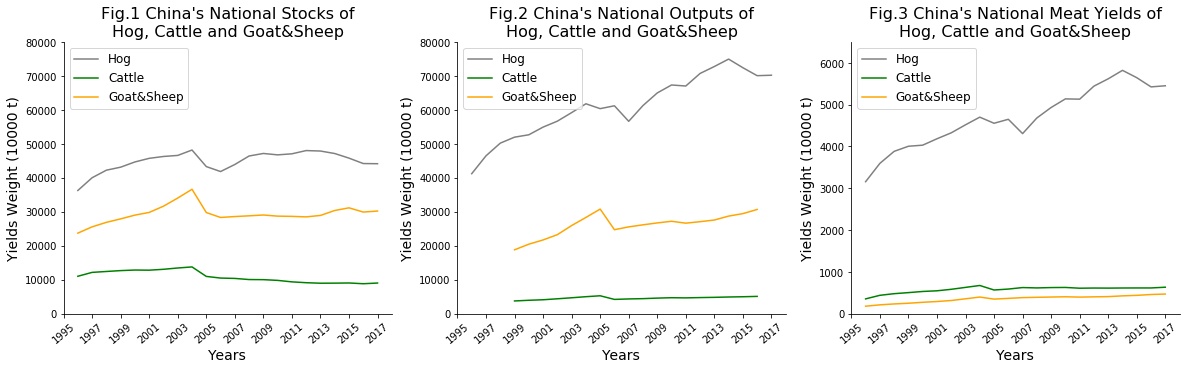

In [9]:
#---------------------------------------------------------------------------------------#
#         Create Subplots of China's National Production of Hog, Cattle, and Goat&Sheep #
#---------------------------------------------------------------------------------------# 

fig_size = (20,5)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

colors=['grey', 'green', 'orange']    # for hog, cattle, goat&sheep

# create figure
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          # adjust layout to tight
plt.subplots_adjust(wspace =0.2, hspace =0) # adjust white space

# ==================================== Fig.1 China's National Stocks of Hog, Cattle and Goat&Sheep

ax0 = fig.add_subplot(1,3,1)  # 2 row, 2 columns, 1st plot
df[AY+HCGS_in][df['AreaName']=='China'].plot(
    kind='line', x='Year', 
    color=colors,
    ax=ax0)

plt.title("Fig.1 China's National Stocks of\nHog, Cattle and Goat&Sheep", fontsize=tit_size)
plt.ylim(0,80000)


# ==================================== Fig.2 China's National Outputs of Hog, Cattle and Goat&Sheep

ax1 = fig.add_subplot(1,3,2)
df[AY+HCGS_out][df['AreaName']=='China'].plot(
    kind='line', x='Year',  
    color=colors,
    ax=ax1)

plt.title("Fig.2 China's National Outputs of\nHog, Cattle and Goat&Sheep",fontsize=tit_size)
plt.ylim(0,80000)


# ==================================== Fig.3 China's National Meat Yields of Hog, Cattle and Goat&Sheep

ax2 = fig.add_subplot(1,3,3)
df[AY+HCGS_yield][df['AreaName']=='China'].plot(
    kind='line', x='Year',
    color=colors,
    ax=ax2)

plt.title("Fig.3 China's National Meat Yields of\nHog, Cattle and Goat&Sheep",fontsize=tit_size)
plt.ylim(0,6500)


def setLegs_HCGS(ax):
    ax.legend(['Hog','Cattle', 'Goat&Sheep'], loc='upper left', fontsize=leg_size)

# set lablegends
for ax in [ax0, ax1, ax2]:
    setLegs_HCGS(ax)
    setX_years(ax)
    setYlab_wei(ax)
    setSpi_LB(ax)
    
plt.show()

图1：全国猪、牛、羊的年末存栏量（相当于养殖规模）

图2：全国猪、牛、羊的出栏量（相当于粗产量）

图3：全国猪肉、牛肉、羊肉的产量（屠宰去头、蹄、骨后的胴体重量）

### 1.2 Compare between the Stocks and Outputs in Hog, Cattle, and Goat&Sheep
The result will reflect the production efficiency

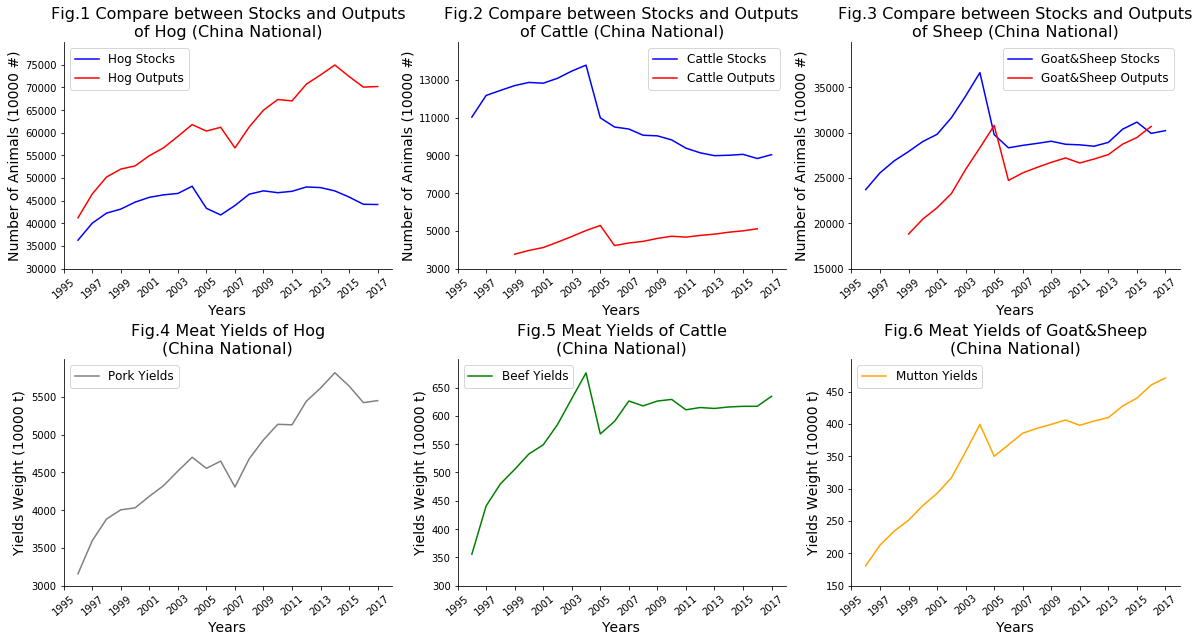

In [10]:
#---------------------------------------------------------------------------------------------#
# Create Subplots of Comparison between the Stocks and Outputs in Hog, Cattle, and Goat&Sheep #
#---------------------------------------------------------------------------------------------#

fig_size = (20,10)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

colors = ['blue', 'red']    # for stock, output

fig = plt.figure(figsize=fig_size)
fig.tight_layout()                          # adjust layout
plt.subplots_adjust(wspace =0.2, hspace =0.4) # adjust white space

# ======================================================== Fig.1 Compare between Stocks and Outputs\nof Hog (China National)  ====================================================
ax0 = fig.add_subplot(2,3,1)  # 2 row, 2 columns, 1st plot
df[AY+hog_inout][df['AreaName']=='China'].plot(
    kind='line', x='Year', 
    color=colors,
    ax=ax0)

plt.title("Fig.1 Compare between Stocks and Outputs\nof Hog (China National)", fontsize=tit_size)
plt.legend(['Hog Stocks','Hog Outputs'], loc='upper left', fontsize=leg_size)

ylim = [30000,80000,5000]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ======================================================== Fig.2 Compare between Stocks and Outputs\nof Cattle (China National)  ==================================================
ax1 = fig.add_subplot(2,3,2)
df[AY+cattle_inout][df['AreaName']=='China'].plot(
    kind='line', x='Year', 
    color=colors,
    ax=ax1)

plt.title("Fig.2 Compare between Stocks and Outputs\nof Cattle (China National)",fontsize=tit_size)
plt.legend(['Cattle Stocks','Cattle Outputs'], loc='upper right', fontsize=leg_size)

ylim = [3000,15000,2000]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ==================================================== Fig.3 Compare between Stocks and Outputs\nof Sheep (China National)  ================================================
ax2 = fig.add_subplot(2,3,3)
df[AY+gs_inout][df['AreaName']=='China'].plot(
    kind='line', x='Year',
    color=colors,
    ax=ax2)

plt.title("Fig.3 Compare between Stocks and Outputs\nof Sheep (China National)",fontsize=tit_size)
plt.legend(['Goat&Sheep Stocks','Goat&Sheep Outputs'], loc='upper right', fontsize=leg_size)

ylim = [15000,40000,5000]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ===================================================== Fig.4 Meat Yields of Hog\n(China National)  ================================================================
ax3 = fig.add_subplot(2,3,4)  # 2 row, 2 columns, 1st plot

df[AY+['MeatYield_hog']][df['AreaName']=='China'].plot(
    kind='line', x='Year', 
    color='grey',
    ax=ax3)
plt.title("Fig.4 Meat Yields of Hog\n(China National)", fontsize=tit_size)
plt.legend(['Pork Yields'], loc='upper left', fontsize=leg_size)

ylim = [3000,6000,500]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ==================================================== Fig.5 Meat Yields of Cattle\n(China National)  ============================================================
ax4 = fig.add_subplot(2,3,5)
df[AY+['MeatYield_cattle']][df['AreaName']=='China'].plot(
    kind='line', x='Year', 
    color='green',
    ax=ax4)
plt.title("Fig.5 Meat Yields of Cattle\n(China National)",fontsize=tit_size)
plt.legend(['Beef Yields'], loc='upper left', fontsize=leg_size)

ylim = [300,700,50]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])

# ===================================================== Fig.6 Meat Yields of Goat&Sheep\n(China National)  ====================================================
ax5 = fig.add_subplot(2,3,6)
df[AY+['MeatYield_gt_shp']][df['AreaName']=='China'].plot(
    kind='line', x='Year',
    color='orange',     
    ax=ax5)

plt.title("Fig.6 Meat Yields of Goat&Sheep\n(China National)",fontsize=tit_size)
plt.legend(['Mutton Yields'], loc='upper left', fontsize=leg_size)

ylim = [150,500,50]
plt.yticks(range(ylim[0],ylim[1],ylim[2]))
plt.ylim(ylim[0],ylim[1])



# set labels 
# ================================================================
for ax in [ax0, ax1, ax2]:
    setYlab_num(ax)
    
# ================================================================    
for ax in [ax3, ax4, ax5]:
    setYlab_wei(ax)
    
# ================================================================
for ax in [ax0, ax1, ax2, ax3, ax4, ax5]:
    setX_years(ax)
    setSpi_LB(ax)
    
plt.show()

图1和图4：猪的存栏量平缓，出栏量和产肉量迅猛增加，说明总体规模稳定，但迅速向集约化发展

图2和图5：牛的存栏量下降，出栏量和产肉量稳定，说明总体规模在缩减，但集约化程度增加

图3和图6：羊的存栏量稳步增长，出栏量和产肉量增长率更快，说明总体规模在稳步增加，且集约化程度也有所增加

2003~2005年，所有养殖产业有一次重大调整

### 1.3 China's National Outputs of Poultry, and Yields of Egg

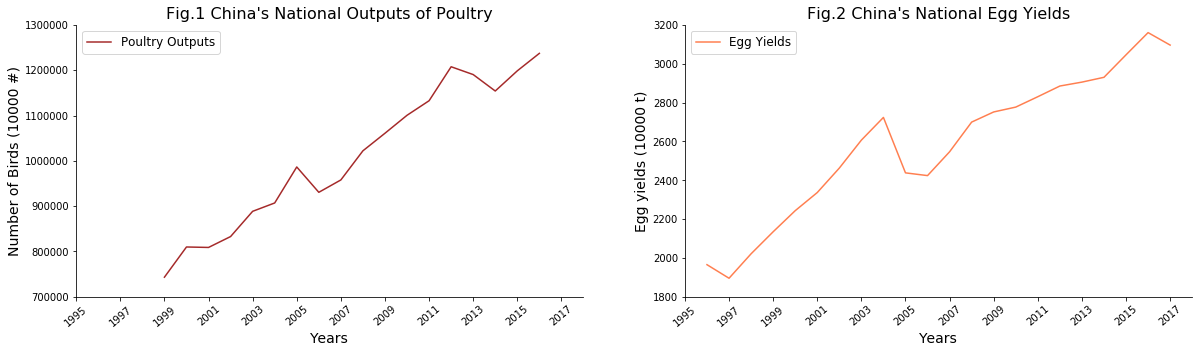

In [11]:
#---------------------------------------------------------------------------------------------#
#                   Create Subplots of China's National Outputs of Poultry, and Yields of Egg #
#---------------------------------------------------------------------------------------------#

fig_size = (20,5)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          # adjust layout
plt.subplots_adjust(wspace =0.2, hspace =0) # adjust white space

# =================================================== Fig.1 China's National Outputs of Poultry =========================================================
ax0 = fig.add_subplot(1,2,1)  # 2 row, 2 columns, 1st plot
df[AY+bird_out][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    color='brown',
    ax=ax0)

plt.title("Fig.1 China's National Outputs of Poultry", fontsize=tit_size)
plt.ylabel('Number of Birds (10000 #)', fontsize=lab_size)
plt.ylim(700000, 1300000)

plt.legend(['Poultry Outputs'], loc='upper left', fontsize=leg_size)



# ======================================================= Fig.2 China's National Egg Yields ===============================================================
ax1 = fig.add_subplot(1,2,2)
df[AY+bird_egg][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, 
    color='coral',
    ax=ax1)

plt.title("Fig.2 China's National Egg Yields",fontsize=tit_size)
plt.ylabel('Egg yields (10000 t)', fontsize=lab_size)
plt.ylim(1800,3200)

plt.legend(['Egg Yields'], loc='upper left', fontsize=leg_size)

# ======================================================== Plot Show ======================================================================================
for ax in [ax0, ax1]:
    setX_years(ax)
    setSpi_LB(ax)
    
plt.show()

### 1.4 China's National Animal Product Yields Weight for Food

<Figure size 720x504 with 0 Axes>

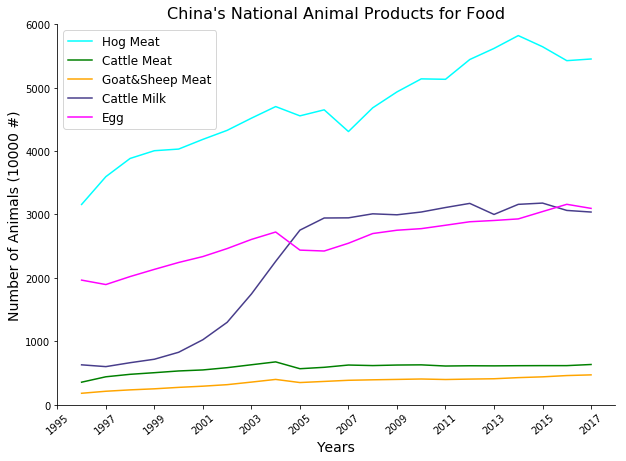

In [14]:
#---------------------------------------------------------------------------------------------#
#                   Create a Plot of China's National Animal Products for Food              #
#---------------------------------------------------------------------------------------------#

fig_size = (10,7)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

colors = ['cyan', 'green', 'orange', 'darkslateblue', 'magenta']

fig = plt.figure(figsize = fig_size)

# draw data
ax = df[AY+yields][df['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size,
    color=colors)

plt.title("China's National Animal Products for Food", fontsize=tit_size)
plt.legend(labels=['Hog Meat','Cattle Meat', 'Goat&Sheep Meat', 'Cattle Milk', 'Egg'], loc='upper left', fontsize=leg_size)
plt.ylim(0,6000)

setX_years(ax)
setYlab_num(ax)
setSpi_LB(ax)
  
plt.show()

## 2. Exploration of Land Animal Product for Food in Different Provinces

In [157]:
def mkPivots(df_, val_col):
    # make a pivot DataFrame for 'val_col': areas as index, years as columns
    df_areas = df_[df_['AreaName']!='China']
    df_ = pd.pivot_table(df_areas,index=['AreaName'],columns=['Year'],values=[val_col],aggfunc=[np.sum],margins=1)
#     print(df_.columns)

    # the result's columns is a multi-index list consists of tuples, so flatten by the last element of each tuple.
    df_.columns.set_names([None, None, None], inplace=True)    # reset multi index name
    df_.columns = df_.columns.get_level_values(-1)
#     print(df_.columns)

    # fix the columns order
    fixed_columns = [df_.columns[-1]] + list(df_.columns[:-1])
    df_ = df_[fixed_columns]
    # rename column 'All' to 'Total' for distinction from index 'All'
    df_.rename(columns = {'All':'Total'}, inplace=True)
#     print(df_.columns)

    # sort areas by the total number of history
    df_.sort_values(['Total'], ascending=False, axis=0, inplace=True)

    # drop 'All' and copy to a new data frame
    df_ = df_.drop(index = 'All')
    df_.reset_index(inplace=True)
    df_.index.name = None
#     print(df_.columns)
    
    return df_

### 2.1 Ainmal Stocks in Different Provinces

In [158]:
areas_hog_in = mkPivots(df, 'Stock_hog')
areas_hog_in.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Sichuan,102657.189712,4793.9,4732.8,4781.07,5270.80,5376.22,5564.8700,5627.31,5744.7700,...,5325.800000,5122.000000,5157.854000,5101.7947,5132.405468,5004.095331,5000.592465,4815.570544,4675.897316,4376.639888
1,Henan,84096.205569,3439.7,3556.4,3587.69,3672.07,3800.00,3914.0000,4232.00,4439.0000,...,4462.000000,4528.930000,4547.045720,4569.0000,4587.280000,4426.744500,4420.000000,4376.000000,4284.104000,4390.000000
2,Hunan,79716.115230,3492.2,3422.4,3583.80,3604.26,3908.50,4108.7000,4343.43,4435.0100,...,3915.300000,4032.759000,4044.857277,4158.2000,4245.522200,4096.907500,4188.300000,4079.404200,3936.625053,3968.100000
3,Shandong,56528.263644,2485.9,2560.5,2660.34,2769.41,2882.96,2975.2145,3058.19,3238.6913,...,2725.800875,2753.058883,2747.552766,2837.1330,2902.387059,2931.410930,2910.700000,2849.575300,2764.088041,3040.326671
4,Yunnan,52584.948622,2507.9,2459.4,2587.14,2518.63,2486.90,2554.1300,2605.49,2601.7100,...,2669.030000,2736.170000,2766.815104,2689.8200,2708.648740,2708.650000,2678.854850,2625.277753,2575.397476,3029.184153


In [159]:
areas_cattle_in = mkPivots(df, 'Stock_cattle')
areas_cattle_in.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Henan,22430.710395,1300.6,1341.0,1340.23,1338.00,1330.63,1396.0000,1423.92,1447.000,...,1051.000000,1044.694000,1010.2000,955.000000,908.205000,905.105395,918.200000,934.000000,887.300000,372.666000
1,Sichuan,20076.259095,955.1,972.1,1002.77,1022.20,1067.40,1078.0000,1105.00,1150.410,...,986.970000,989.169249,964.4000,968.257600,940.178130,949.696896,983.889200,985.296462,969.531719,853.187912
2,Yunnan,15379.116056,773.2,818.7,854.82,793.39,750.39,762.5700,788.62,802.100,...,706.430000,742.570000,746.6500,745.670000,747.161340,730.382280,750.832984,756.839647,789.870000,810.852755
3,Shandong,14216.651341,911.8,977.3,1008.61,1006.85,1018.93,1040.1706,998.83,970.712,...,522.488287,485.613682,483.6700,492.860981,499.268174,500.067003,495.363570,503.570000,495.650300,401.476743
4,Tibet,11967.414978,508.6,527.6,526.24,552.70,577.13,591.4100,612.77,632.470,...,644.490000,645.100000,610.2646,614.900000,600.757300,617.910211,613.060700,616.126004,609.964743,592.620000


In [160]:
areas_gs_in = mkPivots(df, 'Stock_gt_shp')
areas_gs_in.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Inner Mongolia,98505.204394,3712.9,3702.6,3551.58,3515.90,3951.74,4450.1500,5318.48,5419.9900,...,5125.270000,5197.200000,5277.20,5275.9500,5144.051250,5239.209680,5569.279890,5777.800000,5506.243400,6111.930174
1,Xinjiang,74785.770005,3447.4,3592.3,3690.21,3764.90,3908.20,4104.3000,4266.73,4355.5000,...,3025.680000,3127.527263,3013.37,3016.4053,3502.046553,3663.224243,3883.980000,3995.650000,3915.700000,4317.919646
2,Henan,51068.273950,2553.1,2786.3,2961.36,3120.07,3378.02,3315.8000,3910.00,3988.0000,...,2038.000000,1997.240000,1895.40,1865.0000,1827.700000,1830.300000,1886.000000,1926.000000,1858.590000,1682.023950
3,Shandong,49885.845815,2322.0,2536.2,2784.73,2904.47,3039.45,3133.6745,3286.77,3404.8231,...,2142.881997,2096.936176,2138.88,2150.9000,2163.805400,2158.051000,2174.561266,2235.660000,2197.653780,1754.048596
4,Hebei,35933.585495,1924.0,2063.5,2090.01,2185.01,2101.12,2209.7100,2361.70,2481.9700,...,1616.957700,1565.094300,1408.60,1457.2020,1413.485940,1455.140557,1526.399900,1450.094553,1386.290393,1228.100000


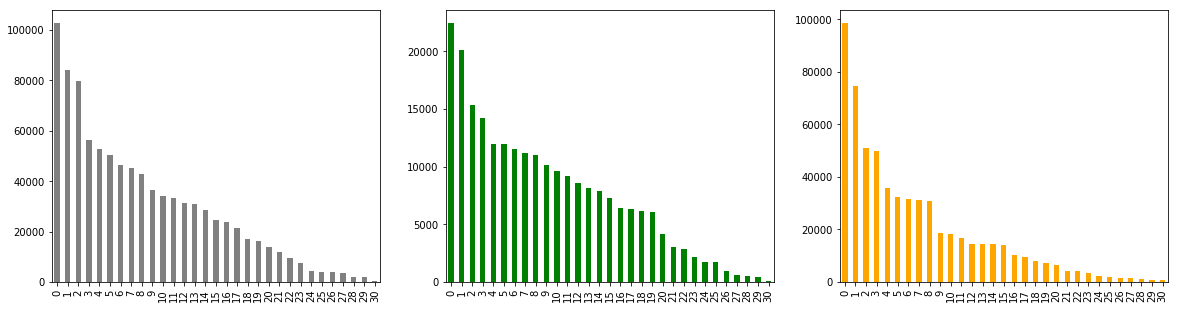

In [161]:
#---------------------------------------------------------------------------------------------#
#                   Create a Plot of Historical Total Stock of Different Areas            #
#---------------------------------------------------------------------------------------------#

fig_size = (20,5)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          # adjust layout to tight
plt.subplots_adjust(wspace =0.2, hspace =0) # adjust white space

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

areas_hog_in['AreaName', 'Total'].plot(
    kind='bar', x='AreaName', 
    color='grey',
    ax=ax0)

areas_cattle_in['Total'].plot(
    kind='bar', x='AreaName', 
    color='green',
    ax=ax1)

areas_gs_in['Total'].plot(
    kind='bar', x='AreaName', 
    color='orange',
    ax=ax2)

plt.show()

### 2.2 Ainmal Outputs in Different Provinces

In [162]:
areas_hog_out = mkPivots(df, 'Out_hog')
areas_hog_out.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Sichuan,132666.133216,5589.8,5622.5,5774.90,5964.00,6202.56,6236.8700,6489.80,7105.0200,...,6431.44900,6915.494135,7178.282912,7002.6000,7170.662400,7314.075648,7445.000000,7236.540000,6925.368780,6579.100341
1,Hunan,114844.403992,5467.3,5385.3,5491.30,5540.50,5653.10,5905.8000,6088.69,6176.3300,...,5153.10000,5508.663900,5723.501792,5575.9000,5878.800000,5902.315200,6220.300000,6077.233100,5920.900000,6116.300000
2,Henan,103330.840791,3592.9,3880.3,3930.00,4218.99,4498.00,4850.0000,5189.00,5568.0000,...,4847.90000,5143.621900,5390.515751,5361.2000,5711.250000,5996.865000,6310.000000,6171.180000,6004.558140,6220.000000
3,Shandong,84062.928107,3123.2,3248.1,3426.78,3594.69,3803.18,4016.1626,4330.24,4585.6914,...,3916.73677,4155.657713,4301.105733,4234.2444,4599.870527,4797.664960,4955.062785,4836.141278,4662.040192,5180.689749
4,Hebei,70654.437574,2902.6,3000.2,3239.10,3470.05,3541.06,3875.1000,4160.14,4510.5800,...,3230.77656,3332.872648,3222.887851,3235.8221,3396.700000,3452.000000,3638.408000,3551.086208,3433.900363,3785.297594


In [163]:
areas_cattle_out = mkPivots(df, 'Out_cattle')
areas_cattle_out.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Henan,10453.17,0.0,573.46,578.00,621.34,640.00,652.80,672.38,689.00,...,560.00,559.78,551.94,545.00,534.65,535.5,546.0,548.6,550.2,0.0
1,Shandong,8236.65,0.0,391.10,413.80,461.80,488.12,509.11,530.60,546.04,...,458.24,454.34,449.35,433.39,437.29,443.4,440.8,447.5,445.5,0.0
2,Hebei,7184.08,0.0,406.61,429.99,452.96,480.02,526.73,557.85,579.26,...,354.09,344.33,361.20,338.98,340.33,325.3,320.6,325.4,331.9,0.0
3,Jilin,5386.78,0.0,254.25,268.08,282.10,295.90,322.01,335.01,350.02,...,271.30,283.80,293.73,294.34,296.40,297.0,299.6,303.2,306.4,0.0
4,Sichuan,4464.39,0.0,187.93,208.97,207.00,218.82,236.50,250.00,262.14,...,249.64,251.79,255.82,251.06,254.04,264.7,278.7,295.5,305.2,0.0


In [164]:
areas_gs_out = mkPivots(df, 'Out_gt_shp')
areas_gs_out.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Inner Mongolia,78156.04,0.0,1948.39,2081.21,2146.50,2156.01,2867.74,3782.99,4539.60,...,5183.70,5339.20,5397.90,5300.17,5390.27,5401.1,5665.7,5596.3,5971.3,0.0
1,Shandong,57071.27,0.0,2838.80,3014.91,3210.88,3358.58,3466.05,3641.44,3876.86,...,3098.80,3057.08,3005.11,2901.22,2915.73,2967.3,3117.8,3195.8,3298.0,0.0
2,Xinjiang,50882.01,0.0,1820.71,2017.36,2147.30,2363.04,2626.94,2790.53,3081.88,...,2842.26,2749.27,2947.22,2913.83,3001.24,3107.5,3327.6,3444.1,3612.8,0.0
3,Henan,47286.56,0.0,2665.33,2903.83,3132.01,3437.22,3780.00,3953.88,4166.00,...,2220.00,2175.60,2114.70,2050.00,2027.45,2032.4,2088.0,2126.0,2168.5,0.0
4,Hebei,37322.64,0.0,1781.38,1868.40,1934.68,2030.69,2179.48,2346.44,2541.99,...,1946.15,2059.08,2143.50,2050.68,2071.50,2105.1,2189.3,2255.0,2303.8,0.0


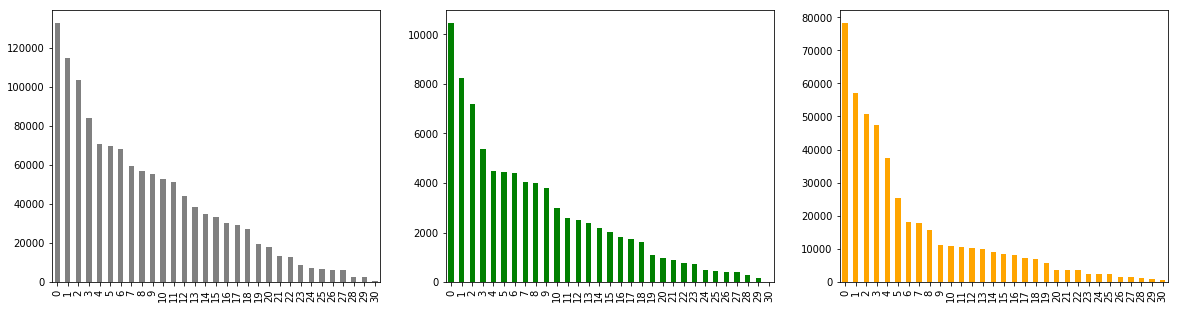

In [165]:
#---------------------------------------------------------------------------------------------#
#                   Create a Plot of Historical Total Outputs of Different Areas            #
#---------------------------------------------------------------------------------------------#

fig_size = (20,5)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          # adjust layout to tight
plt.subplots_adjust(wspace =0.2, hspace =0) # adjust white space

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

areas_hog_out['Total'].plot(
    kind='bar', x='AreaName', 
    color='grey',
    ax=ax0)

areas_cattle_out['Total'].plot(
    kind='bar', x='AreaName', 
    color='green',
    ax=ax1)

areas_gs_out['Total'].plot(
    kind='bar', x='AreaName', 
    color='orange',
    ax=ax2)

plt.show()

### 2.3 Production of Pourltry in Different Provinces

In [166]:
areas_bird_out = mkPivots(df, 'Out_poultry')
areas_bird_out.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Shandong,2754616.59,0.0,100246.00,109168.00,119102.28,126352.58,135918.96,146834.98,173620.04,...,152889.08,156864.19,163295.62,173298.59,188437.62,183726.7,169396.0,176896.0,187826.2,0.0
1,Guangdong,1824826.95,0.0,88302.27,92913.43,94517.20,96613.90,102183.02,98744.44,101019.40,...,108933.29,113617.42,113731.04,111843.10,113073.37,104078.8,95128.0,97423.4,97391.1,0.0
2,Henan,1305475.81,0.0,39883.92,43872.31,48797.71,52847.92,59300.00,62858.00,69270.00,...,75000.00,80512.50,85101.71,88850.00,94358.70,94332.1,90087.2,91550.0,93420.0,0.0
3,Jiangsu,1231565.70,0.0,51945.29,57275.30,58355.33,60486.36,61151.70,58258.68,61706.22,...,68230.52,72665.50,80440.71,84142.96,88575.92,80098.7,75739.6,73536.8,71462.1,0.0
4,Liaoning,1120373.16,0.0,37864.23,38038.83,41175.00,45592.00,47962.00,51223.42,54757.84,...,65602.00,68029.27,71974.97,73526.40,76678.30,75451.4,76814.8,86493.5,91622.8,0.0


In [167]:
areas_bird_egg = mkPivots(df, 'EggYield')
areas_bird_egg.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Shandong,7928.625588,322.0,349.1,366.2,379.0377,399.4099,424.6878,432.8712,441.8334,...,364.983542,377.117709,384.282945,401.187,401.989374,396.206800,388.02429,423.900000,440.592429,444.778057
1,Hebei,7582.617429,319.0,338.6,357.0,369.6275,389.4434,415.1898,432.9416,458.9667,...,410.998367,353.211997,339.083517,339.837,342.555696,346.060000,362.71280,373.594184,388.537951,383.721654
2,Henan,7111.274119,229.3,251.8,270.0,286.0045,302.0000,326.2000,347.4000,375.3000,...,371.700000,382.850000,388.592750,390.500,404.167500,410.232550,404.00000,410.000000,422.500000,401.181632
3,Liaoning,4482.978159,131.6,134.4,140.3,148.3621,159.8264,169.5053,192.3857,224.0456,...,254.200000,263.097000,275.725656,277.400,279.896600,276.817737,279.30000,276.500000,287.600000,270.432820
4,Jiangsu,3681.794549,157.1,168.2,181.4,180.1300,187.2500,188.1862,175.3895,182.0050,...,172.095800,185.200000,190.570800,194.863,197.201356,197.874300,194.58000,196.230000,198.500000,183.390000


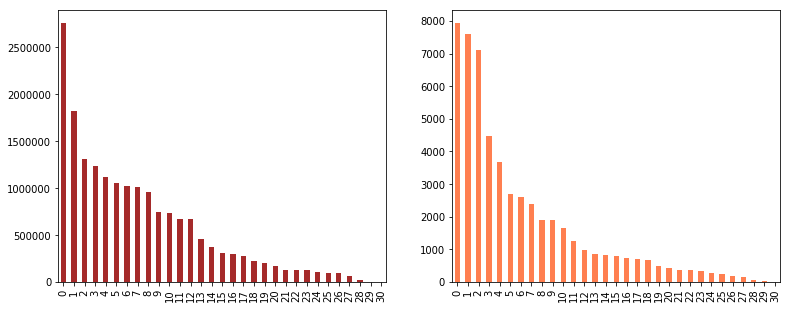

In [168]:
#---------------------------------------------------------------------------------------------#
#                   Create a Plot of Historical Total Outputs of Different Areas            #
#---------------------------------------------------------------------------------------------#

fig_size = (20,5)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          # adjust layout to tight
plt.subplots_adjust(wspace =0.2, hspace =0) # adjust white space

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)

areas_bird_out['Total'].plot(
    kind='bar', x='AreaName', 
    color='brown',
    ax=ax0)

areas_bird_egg['Total'].plot(
    kind='bar', x='AreaName', 
    color='coral',
    ax=ax1)

plt.show()

### 2.4 Animal Product Yield for Food in different Areas

In [169]:
areas_pork = mkPivots(df, 'MeatYield_hog')
areas_pork.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Sichuan,9421.030339,390.4,405.2,419.1007,441.20000,458.8500,461.6000,480.2000,513.68700,...,436.241474,474.194483,492.213873,484.8,496.435200,510.831821,527.177511,512.416541,494.481962,472.230274
1,Hunan,8204.678352,365.0,364.9,371.7571,389.76916,396.8608,419.3258,429.1177,436.96840,...,370.233448,395.409322,412.411923,406.1,427.600000,430.593200,458.100000,448.021800,434.800000,449.600000
2,Henan,8013.001701,297.9,314.0,322.8812,343.77440,366.4908,386.0000,410.3180,440.82520,...,367.100000,389.590818,408.291177,406.4,432.500000,454.125000,478.000000,467.962000,450.647406,466.900000
3,Shandong,6912.982214,266.6,272.5,285.8800,298.74460,314.8382,332.6371,346.4193,367.05339,...,321.342370,341.265597,353.209893,346.9,376.696379,392.894323,406.800000,397.443600,383.533074,427.441088
4,Hebei,5361.102485,219.1,226.5,242.8362,260.25490,265.1646,290.2523,313.3789,337.36960,...,245.775144,253.558906,245.191462,246.6,259.000000,265.285714,281.218000,275.031204,265.405112,291.469920


In [170]:
areas_beef = mkPivots(df, 'MeatYield_cattle')
areas_beef.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Henan,1680.669017,76.7,82.2,83.0000,89.225000,89.2000,93.0000,98.3250,100.783000,...,84.100000,83.970000,83.046330,82.0000,80.44200,80.560800,82.100000,82.600000,83.013000,35.039787
1,Shandong,1421.614996,60.1,65.5,69.1800,72.964526,76.1473,79.6500,79.5898,80.721967,...,70.674212,69.631723,68.656879,66.2300,66.95853,67.895949,66.605926,67.871439,66.989110,75.928893
2,Hebei,1268.734196,58.0,61.9,65.2916,68.502300,71.2296,78.5867,82.9053,86.859300,...,56.831218,55.262676,58.081073,54.4609,55.30000,52.300000,52.404600,53.190669,54.254482,55.600000
3,Jilin,842.351752,28.3,31.3,33.5449,35.295200,36.9973,40.2513,48.9700,51.002300,...,39.967900,41.820000,43.241880,43.3950,44.95722,45.047134,45.990273,46.588147,47.100617,38.028096
4,Inner Mongolia,779.249702,17.6,17.8,21.8440,23.214700,19.4890,24.0252,28.7156,33.597300,...,43.090200,47.400000,49.708380,49.7300,51.17217,51.786236,54.530907,52.894979,55.592623,59.484107


In [171]:
areas_mutton = mkPivots(df, 'MeatYield_gt_shp')
areas_mutton.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Inner Mongolia,1410.852156,27.0,29.8,31.8166,32.5724,33.8107,45.3163,60.3598,72.43180,...,84.843600,88.200000,89.200000,87.23000,88.625680,88.802931,93.331881,92.591769,98.980602,104.127593
1,Xinjiang,978.807786,32.5,33.6,37.4966,40.4844,42.6172,45.5438,52.6500,59.89000,...,45.968150,43.800000,46.950000,46.43595,48.014772,49.714348,53.610335,55.433086,58.315606,58.241447
2,Shandong,646.280978,20.9,23.3,24.8000,27.5608,30.2272,32.9275,34.9881,36.35506,...,33.210452,32.900000,32.670000,32.48640,33.103642,33.687315,36.011740,37.092092,38.390316,36.027773
3,Henan,627.877097,28.0,30.0,32.0000,34.5147,37.8465,42.0000,44.6460,46.66120,...,26.500000,25.890500,25.200000,24.80000,24.750400,24.758497,25.400000,25.900000,26.443900,26.100000
4,Hebei,570.163785,21.8,23.4,24.5944,25.5697,26.7059,29.0202,31.0963,33.72790,...,26.479663,28.015483,29.305334,28.41150,28.700000,29.051405,30.438600,31.672589,32.365607,30.100000


In [172]:
areas_milk = mkPivots(df, 'MilkYield_cattle')
areas_milk.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Inner Mongolia,11943.271027,63.8,67.9,79.7774,106.23650,165.1996,308.0222,497.8733,691.0481,...,912.234900,903.100000,905.177130,908.200000,910.202000,767.298600,788.015662,803.20000,734.124800,552.857835
1,Heilongjiang,8296.825224,142.1,142.8,154.2992,188.98430,235.7546,300.4701,374.4782,440.2393,...,508.359800,528.700000,552.491500,543.102467,559.938644,518.226566,556.575332,570.47834,545.947772,465.214803
2,Hebei,6719.872430,55.8,68.4,84.1984,107.37840,136.8887,197.9021,266.4643,340.3456,...,504.511866,451.500000,439.761000,458.895400,470.367785,458.000000,487.770000,473.13690,440.490454,381.005725
3,Shandong,3759.030016,27.5,35.6,45.7300,61.78123,90.3023,124.3868,160.8798,187.0747,...,230.512793,236.275613,253.051181,268.866880,283.923425,271.430795,279.600000,275.38000,268.395660,223.543880
4,Henan,3683.496692,7.8,10.3,16.0972,27.02470,36.0001,49.6000,74.5000,104.0000,...,279.100000,281.891000,290.911512,306.600000,316.104600,316.416100,332.000000,342.20000,326.801000,202.857581


In [173]:
areas_egg = mkPivots(df, 'EggYield')
areas_egg.head()

,AreaName,Total,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Shandong,7928.625588,322.0,349.1,366.2,379.0377,399.4099,424.6878,432.8712,441.8334,...,364.983542,377.117709,384.282945,401.187,401.989374,396.206800,388.02429,423.900000,440.592429,444.778057
1,Hebei,7582.617429,319.0,338.6,357.0,369.6275,389.4434,415.1898,432.9416,458.9667,...,410.998367,353.211997,339.083517,339.837,342.555696,346.060000,362.71280,373.594184,388.537951,383.721654
2,Henan,7111.274119,229.3,251.8,270.0,286.0045,302.0000,326.2000,347.4000,375.3000,...,371.700000,382.850000,388.592750,390.500,404.167500,410.232550,404.00000,410.000000,422.500000,401.181632
3,Liaoning,4482.978159,131.6,134.4,140.3,148.3621,159.8264,169.5053,192.3857,224.0456,...,254.200000,263.097000,275.725656,277.400,279.896600,276.817737,279.30000,276.500000,287.600000,270.432820
4,Jiangsu,3681.794549,157.1,168.2,181.4,180.1300,187.2500,188.1862,175.3895,182.0050,...,172.095800,185.200000,190.570800,194.863,197.201356,197.874300,194.58000,196.230000,198.500000,183.390000


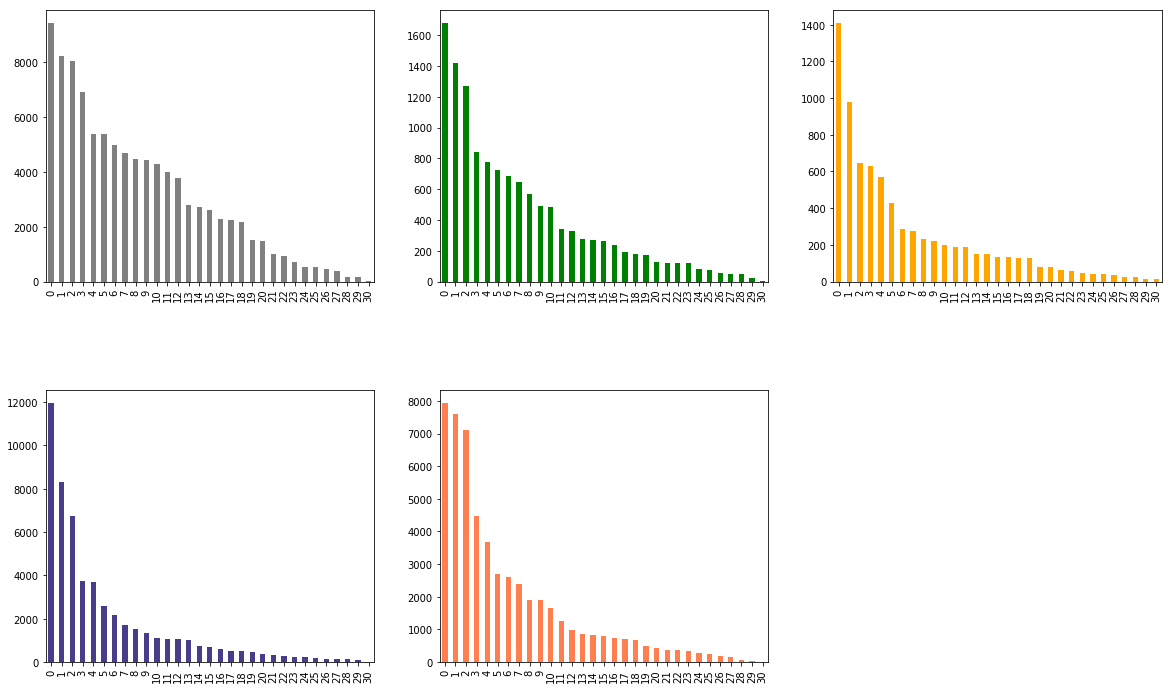

In [174]:
#---------------------------------------------------------------------------------------------#
#                   Create a Plot of Historical Total Outputs of Different Areas            #
#---------------------------------------------------------------------------------------------#

fig_size = (20,12)
tit_size = 16
lab_size = 14
leg_size = 12
tck_size = 12

fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          # adjust layout to tight
plt.subplots_adjust(wspace =0.2, hspace =0.4) # adjust white space

ax0 = fig.add_subplot(2,3,1)
ax1 = fig.add_subplot(2,3,2)
ax2 = fig.add_subplot(2,3,3)
ax3 = fig.add_subplot(2,3,4)
ax4 = fig.add_subplot(2,3,5)

areas_pork['Total'].plot(
    kind='bar', x='AreaName', 
    color='grey',
    ax=ax0)

areas_beef['Total'].plot(
    kind='bar', x='AreaName', 
    color='green',
    ax=ax1)

areas_mutton['Total'].plot(
    kind='bar', x='AreaName', 
    color='orange',
    ax=ax2)

areas_milk['Total'].plot(
    kind='bar', x='AreaName', 
    color='darkslateblue',
    ax=ax3)

areas_egg['Total'].plot(
    kind='bar', x='AreaName', 
    color='coral',
    ax=ax4)

plt.show()

### Draw Map

In [175]:
# ! pip install folium==0.5.0

In [ ]:
!conda install -c conda-forge folium

In [ ]:
import folium
import json
import folium.colormap as cm

In [ ]:
# geo_name = 'world_countries.json'
# path = 'https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json'
# world_provinces = ReadData(geo_name,url=path).curl()

In [ ]:
# geo_name = 'cn_provinces.geojson'
# path = 'https://raw.githubusercontent.com/chemzqm/geomap/master/china-province.geojson'
# cn_provinces = ReadData(geo_name, url=path)
# cn_provinces.curl()

In [246]:
cn_geo = r'cn_provinces.geojson'

def mkMap(df_, ind_name, val_col, color):
    # create a numpy array of length 6 and has linear spacing 
    # from the minium total immigration to the maximum total immigration
    threshold_scale = np.linspace(df_[val_col].min(),
                                  df_[val_col].max(),
                                  6, dtype=int)

    # change the numpy array to a list
    threshold_scale = threshold_scale.tolist()

    # make sure that the last value of the list is greater than the maximum immigration
    threshold_scale[-1] = threshold_scale[-1] + 1

    # let Folium determine the scale.
    cn_map = folium.Map(
        width=1000,height=600,
        location=[40, 105], 
        zoom_start=4, 
        tiles='Mapbox Bright')

    cn_map.choropleth(
        geo_data=cn_geo,
        data=df_,
        columns=[ind_name, val_col],
        key_on='feature.properties.NAME',   # must be 'feature', not 'features'
        threshold_scale=threshold_scale,
        fill_color=color, 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='Num of Animals (10000 #)',
        reset=True
    )
    return cn_map

In [247]:
mkMap(areas_hog_in, 'AreaName', 'Total', 'WtOrBl')

ValueError: WtOrBl is not a valid ColorBrewer code